In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
# Provides a visual representation of topic themes for easier interpretation.

In [2]:
df=pd.read_csv(r"D:\downloads\abcnews-date-text.csv")

df


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [3]:
#to select only a million rows to use in our dataset and axis =0 denotes that sampling the rows
data = df.sample(n=100000, axis=0) 


In [4]:
#initialize data with only headline_text
data= data['headline_text']  
# data=data[dat]
data

429974               witnesses sought to ballarat shop blaze
189730                          mareeba to host rodeo school
916788       gold coast tipped to benfit from fta with china
938381     taliban suicide bomb attacks on pakistan churc...
1018149    storm katie winds power outages traffic chaos ...
                                 ...                        
510261                  steeleye spans tim hart dies aged 61
768009                 beale set to be sidelined for a month
296125     tennant creek to consider normalisisng town camps
1051260    lockerbie no model for the effective prosecuti...
996829     walgett school revamp yelding results; says mi...
Name: headline_text, Length: 100000, dtype: object

In [5]:
#lemmatization and removing stopwords

#Punkt is a valuable tool for sentence segmentation in NLP
nltk.download('punkt')

# it is categorised the words like synonyms,hypernyms,word similarity (cat,dog)
nltk.download('wordnet')

#removing stopwords like a,the,an,is ex-pronoun , adjective,verb
nltk.download('stopwords')

#It creates an instance of the WordNetLemmatizer class, 
#a powerful tool for reducing words to their base forms (lemmas) using linguistic knowledge.
lemmatizer = WordNetLemmatizer()
#It creates a set of stop words in English .Includes words like "the," "a," "an," "of," "is," "in," "to," etc.
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    #lemmatize is a function which takes two parameter word and
    #pos: Optional part of speech tag (e.g., 'n' for noun, 'v' for verb) to improve accuracy.but here we take only word
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words



data = data.apply(preprocess)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


429974              [witness, sought, ballarat, shop, blaze]
189730                        [mareeba, host, rodeo, school]
916788             [gold, coast, tipped, benfit, fta, china]
938381     [taliban, suicide, bomb, attack, pakistan, chu...
1018149    [storm, katie, wind, power, outage, traffic, c...
                                 ...                        
510261             [steeleye, span, tim, hart, dy, aged, 61]
768009                        [beale, set, sidelined, month]
296125     [tennant, creek, consider, normalisisng, town,...
1051260     [lockerbie, model, effective, prosecution, mh17]
996829     [walgett, school, revamp, yelding, result, ;, ...
Name: headline_text, Length: 100000, dtype: object

In [7]:
# Create a dictionary from the preprocessed data
#This code creates a dictionary object, 
#a crucial component in Latent Dirichlet Allocation (LDA) for representing text data numerically.
#The dictionary scans data and assigns a unique integer ID to each distinct word it encounters.
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)
#in every document for words there is an id given by dictionary and from the bow bag of words 
#its stores words with thier id and frequency as tuples and create a vector for every document
bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
# bow_corpus: The bag-of-words corpus, a list of vectors representing each document's word frequencies.
# num_topics: The desired number of topics to extract (set to 5 in this case).
# id2word: The Dictionary object used to map word IDs back to their actual words for interpretation.
# passes: The number of iterations (20) the model will run over the corpus to refine its topic assignments. More passes can lead to better convergence but take longer to train.
# alpha: Hyperparameter controlling document-topic density (set to 'auto' for automatic estimation).
# eta: Hyperparameter controlling topic-word density (also set to 'auto').
# Model Training:
# The model analyzes the bow_corpus and iteratively:
# Assigns words to topics based on their co-occurrence patterns.
# Updates word-topic and document-topic probabilities.
# Repeats this process for the specified number of passes to optimize topic coherence.


num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
# Use log=False when you need precise probability values for further analysis or comparison.
# Use log=True (the default) for a more visually interpretable summary of word importance within topics.
# When formatted=True, the output is a human-readable string, making it easier to glance at topic content.
# When formatted=False, a list of tuples is returned, suitable for programmatic manipulation and further processing.

topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)
print(type(topics))

# Print the topics
# Creates a list comprehension that extracts only the words from the topic list, 
# discarding the probabilities (represented by the underscore _).

for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))
    
    

<class 'list'>
Topic: 0
Words: ['police', 'man', 'woman', 'death', 'interview', 'crash', 'sydney', 'home', 'murder', 'face']
Topic: 1
Words: ['australia', 'fire', 'win', 'day', 'south', 'world', 'school', 'set', 'first', 'one']
Topic: 2
Words: ['new', 'say', 'council', 'call', 'court', 'plan', 'nsw', 'govt', 'back', 'wa']
Topic: 3
Words: ['get', 'hospital', 'cut', 'worker', 'boost', 'group', 'help', 'service', 'funding', 'resident']
Topic: 4
Words: ['u', 'australian', 'water', 'year', 'hit', 'market', 'coronavirus', 'coast', 'case', 'china']


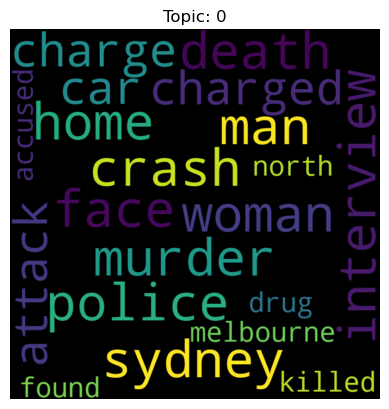

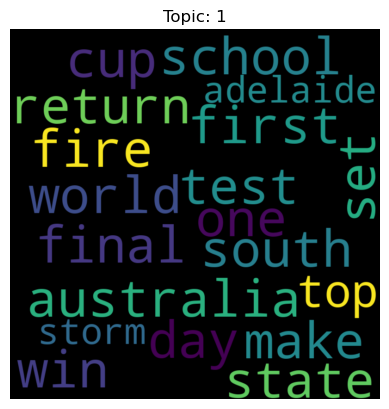

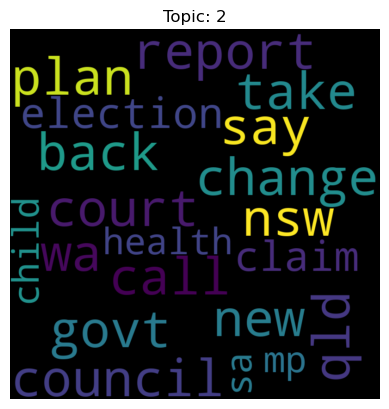

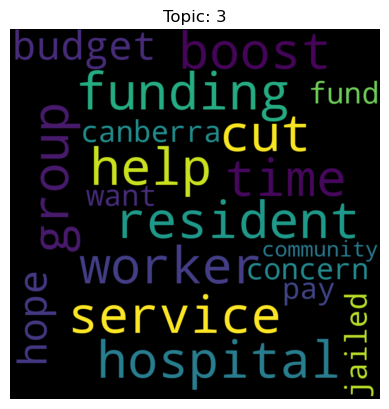

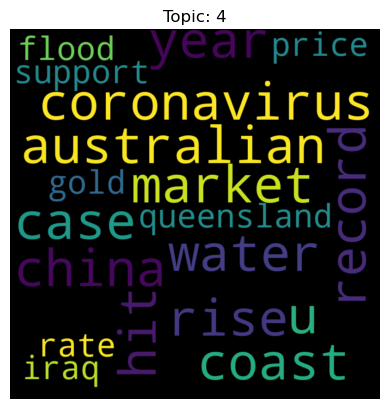

In [10]:
# Plot a wordcloud for each topic

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()